# Introdución á Visión Artificial con *OpenCV* e *Python*
## Cargar librerías
Empregando o entorno de execución aloxado, cargamos as librerías de procesado e visualización de imaxe dende a consola *python*.
 

In [55]:
import cv2 # OpenCV
import numpy as np # Manexo de matrices
%matplotlib inline
from matplotlib import pyplot as plt # Visualización de imaxes dentro do notebook

## Cargar imaxes con OpenCV
En OpenCV existe a función `imread` que le distintos tipos de formatos de imaxe. O primeiro parámetro é a ruta absoluta ou relativa á imaxe no sistema de ficheros. Existe un segundo parámetro (opcional) para indicar como queremos cargar a imaxe, en escala de grises (`cv2.IMREAD_GRAYSCALE`), en cor (`cv2.IMREAD_COLOR`), ou no formato orixinal da imaxe (`cv2.IMREAD_UNCHANGED`). Por defecto, as imaxes cárganse no seu formato orixinal.


In [56]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/lramosg/imaxes_va/main/astronaut.jpg \
    -O astronaut.jpg

imaxe = cv2.imread("astronaut.jpg", cv2.IMREAD_GRAYSCALE)
print("Dimensións da imaxe", imaxe.shape)
print("Número total de pixeles", imaxe.size)

--2021-10-29 12:53:13--  https://raw.githubusercontent.com/lramosg/imaxes_va/main/astronaut.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44382 (43K) [image/jpeg]
Saving to: ‘astronaut.jpg’

astronaut.jpg       100%[===================>]  43.34K  --.-KB/s    in 0.006s  

2021-10-29 12:53:13 (6.76 MB/s) - ‘astronaut.jpg’ saved [44382/44382]

Dimensións da imaxe (480, 384)
Número total de pixeles 184320


## Visualizar imaxes

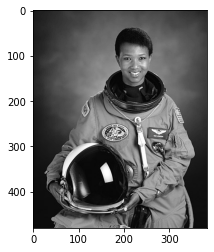

In [57]:
plt.imshow(imaxe, cmap = 'gray')
plt.show()

### Exercicio
Modifica o código da seguinte celda para ler a imaxe empregando o parámetro `CV2.IMREAD_COLOR` na chamada a `imread`. 

Que cambios se aprecian?

In [58]:
# Modifica aquí o código para ler a imaxe en cor
imaxe_cor = cv2.imread("astronaut.jpg", cv2.IMREAD_GRAYSCALE) 
print ("Dimensións da imaxe en cor", imaxe_cor.shape)
print ("Número total de pixeles en cor", imaxe_cor.size)

Dimensións da imaxe en cor (480, 384)
Número total de pixeles en cor 184320


## Espazo de cor RGB (Red - Green - Blue)
Os píxeles nunha imaxe RGB están formados pola combinación lineal das intensidades de cor vermella (R), verde (G) e azul (B). 
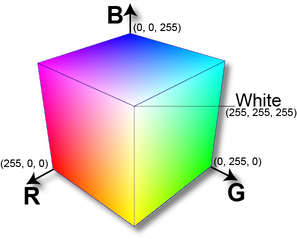

--2021-10-29 12:53:13--  https://raw.githubusercontent.com/lramosg/imaxes_va/main/balls.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59000 (58K) [image/jpeg]
Saving to: ‘balls.jpg’

balls.jpg           100%[===================>]  57.62K  --.-KB/s    in 0.007s  

2021-10-29 12:53:13 (7.95 MB/s) - ‘balls.jpg’ saved [59000/59000]



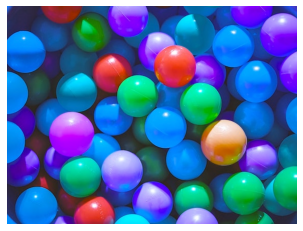

In [59]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/lramosg/imaxes_va/main/balls.jpg \
    -O balls.jpg

bgr = cv2.imread("balls.jpg", cv2.IMREAD_COLOR)

plt.imshow(bgr)
plt.axis('off')
plt.show()

Por defecto, en *OpenCV* as imaxes en cor cárganse en formato BGR: primeira canle azul (B), segunda verde (G) e terceira roxa (R). 

Para amosar as cores no formato RGB invertimos a primeira e terceira canle.

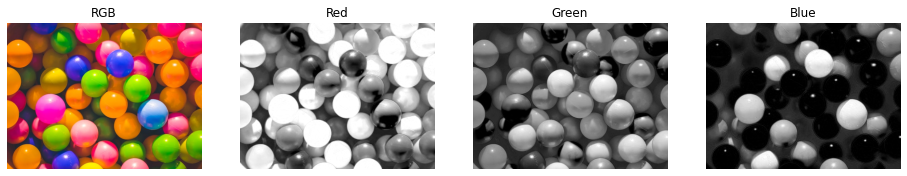

In [60]:
rgb = bgr[:, :, ::-1]  # Invertir canles para obter imaxe RGB a partir da imaxe BGR
red = rgb[:,:,0]       # Primeira canle roxa (R)
green = rgb[:,:,1]     # Segunda canle verde (G)
blue = rgb[:,:,2]      # Terceira canle azul (B)

# Visualización da imaxe RGB e cada canle por separado
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
ax = axes.ravel()

imaxes = [rgb, red, green, blue]
canles = ['RGB', 'Red', 'Green', 'Blue']
for i, (im, canle) in enumerate(zip(imaxes, canles)):
  ax[i].imshow(im, cmap='gray')
  ax[i].set_title(canle)
  ax[i].axis('off')
plt.show()

## Acceder aos valores das imaxes
As imaxes son matrices e podemos acceder a píxeles ou conxuntos de píxeles a través das dúas coordeadas (fila, columna).

Valor mínimo 0
Valor máximo 255
45
(15, 15)
[[ 84 100 112 116 126 137 134 121 108 116 110 104 102 104 110]
 [121 132 136 134 143 159 165 158 142 140 132 137 137 134 140]
 [120 128 136 141 146 150 151 149 167 154 131 123 119 118 131]
 [120 120 126 135 139 140 145 153 148 167 169 157 137 125 126]
 [114 116 116 112 109 115  89  94  89  93  93 114 133 143 146]
 [103 107  81  60  39   6  22  32   3  47  23  12  11  56 135]
 [ 79  48  45  33  57  68  12  10   7 146 177  97 147   0  36]
 [ 69  49  28   3 102 235 129 117   0  19  16 213 253 177   5]
 [ 77  58  58  44   0  54  39  11   4   0  71 242 202 162  46]
 [ 84  80  77 104  94  61  54  45  39  79 100  91  86  62  69]
 [ 98 103 105 103 124 138 145 133 142 158 139 144 143 131 147]
 [117 125 114 113 101 103 111 117 121 124 137 133 114 127 136]
 [123 128 130 129 129 130 127 121 124 123 121 122 129 142 158]
 [127 132 137 138 141 144 141 136 140 134 130 137 153 166 165]
 [126 132 137 140 144 147 144 139 136 133 131 138 154 162 148]]


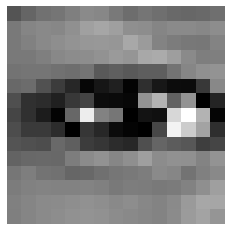

In [61]:
print("Valor mínimo", imaxe.min())
print("Valor máximo", imaxe.max())
print(imaxe[10,50]) # Valor do píxel na fila 10, columna 50

ollo = imaxe[100:115, 200:215] # Submatriz entre as filas 100-115 e as columnas 200-215
print(ollo.shape) # Dimensións da submatriz
print(ollo) # Valores dos píxeles da submatriz

plt.imshow(ollo, cmap = 'gray')
plt.axis('off')
plt.show()


### Exercicio
A partir de `imaxe` crea unha submatriz que conteña a cara da astronauta e utiliza a función `imshow` para visualizala.

In [62]:
# Escribe aquí o teu código

## Modificar os valores das imaxes
Podemos establecer valores a píxeles ou conxuntos de píxeles a través das súas coordeadas (fila, columna).


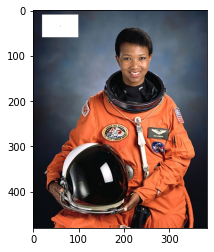

In [63]:
imaxe_cor = cv2.imread('astronaut.jpg', cv2.IMREAD_COLOR)
imaxe_cor[10:60, 20:100] = (255, 255, 255)
imaxe_cor[35, 60] = (0, 0, 0)
plt.imshow(imaxe_cor[:,:,::-1])
plt.show()

Hai algunhas funcións predefinidas en OpenCV para debuxar formas básicas como liñas, círculos ou rectángulos. 

NOTA: Nas funcións de debuxado as coordeadas están na orde (columna, fila).

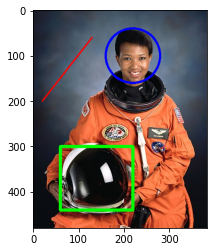

In [64]:
imaxe_cor = cv2.imread('astronaut.jpg', cv2.IMREAD_COLOR)

# imaxe, punto inicial e punto final, cor BGR, grosor
cv2.line(imaxe_cor, (20, 200), (130, 60), (0, 0, 255), 2)
# imaxe, centro, radio, cor BGR, grosor
cv2.circle(imaxe_cor, (220, 100), 60, (255, 0, 0), 3)
# imaxe, coordeadas arriba-esquerda e abaixo-dereita, cor BGR, grosor
cv2.rectangle(imaxe_cor, (60, 300), (220, 440), (0, 255, 0), 5)

plt.imshow(imaxe_cor[:,:,::-1])
plt.show()

### Exercicio
Modifica o código da celda anterior para modificar o tamaño, cor e posición das figuras debuxadas sobre a imaxe.

## Umbralización
Aplicando un umbral sobre os valores dos píxeles das imaxes, podemos converter unha imaxe en escala de grises nunha imaxe binaria (dous valores).

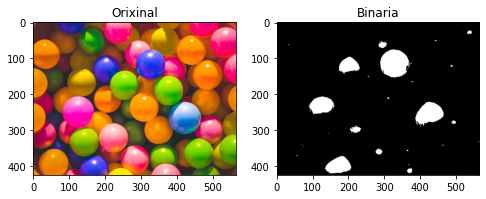

In [65]:
binary = blue.copy()
umbral = 200
binary[blue>umbral] = 255
binary[blue<=umbral] = 0

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(rgb)
ax[0].set_title("Orixinal")
ax[1].imshow(binary, cmap = 'gray')
ax[1].set_title("Binaria")
plt.show()

## Crear e aplicar máscaras
Os algoritmos de procesado de imaxes adoitan usar máscaras para extraer a rexión de interese (ROI) a analizar na imaxe. Unha máscara é unha imaxe de 0's e 1's do mesmo tamaño que a imaxe.

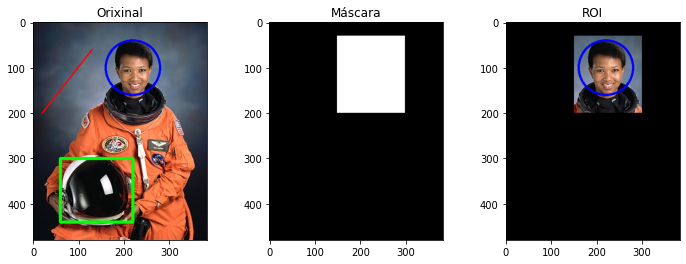

In [66]:
mascara = np.zeros(imaxe_cor.shape, dtype=np.uint8) # Crear imaxe de zeros co mesmo tamaño que a imaxe orixinal
mascara[30:200, 150:300] = 1  # Definir a ROI

masked = imaxe_cor[:,:,::-1] * mascara  # Aplicar a máscara

# Visualizar as imaxes
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(imaxe_cor[:,:,::-1])
ax[0].set_title("Orixinal")
ax[1].imshow(mascara*255)
ax[1].set_title("Máscara")
ax[2].imshow(masked)
ax[2].set_title("ROI")
plt.show()

### Exercicio
Crea e aplica unha máscara circular para obter a rexión da cara na imaxe `astronaut.jpg`

In [67]:
imaxe_cor = cv2.imread('astronaut.jpg', cv2.IMREAD_COLOR)
mascara = np.zeros(imaxe_cor.shape, dtype=np.uint8) 

# Escribe aquí o teu código


## Filtrado por cor

O espazo RGB non é axeitado para filtrado por cor xa que a información da cor e a luminancia están mezcladas.

### Espazo de cor HSV (Hue-Saturation-Value)

O espazo HSV ten tres canles:
- Tono (H) contén información relacionada coa cor.
- Saturación (S) comprende os matices de cor.
- Valor (V) representa a intensidade da luminancia.

Así a crominancia e a luminancia están separadas, resultando mais axeitado para o filtrado por cor a partir dun umbral.  


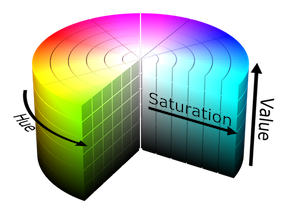

In [68]:
def filtrado_cor(imaxe, lower_color, upper_color, cor):
  # Converter a imaxe BGR ao espazo de cor HSV
  hsv = cv2.cvtColor(imaxe, cv2.COLOR_BGR2HSV)
  # Crear unha máscara para a cor coa función inRange
  color_mask = cv2.inRange(hsv, lower_color, upper_color)
  # Aplicar función bitwise na imaxe orixinal empregando a máscara
  color = cv2.bitwise_and(imaxe, imaxe, mask=color_mask)

  # Visualizar as imaxes
  fig, axes = plt.subplots(1, 3, figsize=(12, 4))
  ax = axes.ravel()

  imaxes = [imaxe[:,:,::-1], color_mask, color[:,:,::-1]]
  canles = ['RGB', 'Mask', cor]
  for i, (im, canle) in enumerate(zip(imaxes, canles)):
    ax[i].imshow(im, cmap='gray')
    ax[i].set_title(canle)
    ax[i].axis('off')
  plt.show()



--2021-10-29 12:53:15--  https://raw.githubusercontent.com/lramosg/imaxes_va/main/cores.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 223943 (219K) [image/jpeg]
Saving to: ‘cores.jpg’

cores.jpg           100%[===================>] 218.69K  --.-KB/s    in 0.02s   

2021-10-29 12:53:16 (11.7 MB/s) - ‘cores.jpg’ saved [223943/223943]



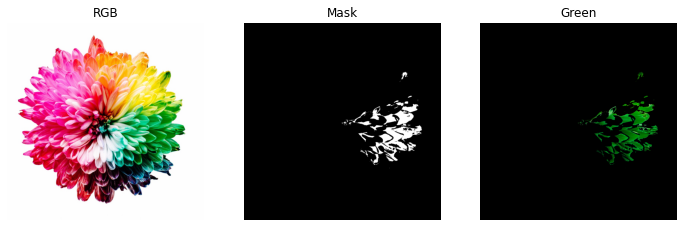

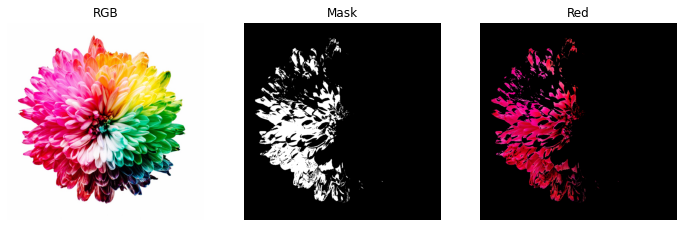

In [69]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/lramosg/imaxes_va/main/cores.jpeg \
    -O cores.jpg

cores = cv2.imread("cores.jpg", cv2.IMREAD_COLOR)
 
# Definir os umbrais para a cor verde 
lower_green = np.array([50, 100, 50])
upper_green = np.array([70, 255, 255])

# Filtrar cor verde
filtrado_cor(cores, lower_green, upper_green, 'Green')

# Definir os umbrais para a cor vermella 
lower_red = np.array([161, 155, 84])
upper_red = np.array([179, 255, 255])

# Filtrar cor vermella
filtrado_cor(cores, lower_red, upper_red, 'Red')


### Exercicio
Na seguinte celda emprega a función `filtrado_cor` para filtrar a capa vermella na imaxe `handmaid.png`.

In [70]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/lramosg/imaxes_va/main/handmaid.png \
    -O handmaid.png

# Cargar a imaxe en cor
handmaid = cv2.imread("handmaid.png", cv2.IMREAD_COLOR)

# Escribe aquí o teu código


--2021-10-29 12:53:17--  https://raw.githubusercontent.com/lramosg/imaxes_va/main/handmaid.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 766951 (749K) [image/png]
Saving to: ‘handmaid.png’

handmaid.png        100%[===================>] 748.98K  --.-KB/s    in 0.03s   

2021-10-29 12:53:17 (23.2 MB/s) - ‘handmaid.png’ saved [766951/766951]



## Detección de caras
O algoritmo tipo [`Haar Cascades`](https://www.pyimagesearch.com/2021/04/12/opencv-haar-cascades/) introducido por Paul Viola e Michael Jones segue un enfoque basado na aprendizaxe automática na que unha función en cascada adestra a partir de moitas mostras de exemplo positivas e negativas para aprender a identificar patróns. 

Neste caso empregaremos un clasificador previamente adestrado para a clasificación de caras. 



In [71]:
# Descargar imaxe e detector de caras
!wget --no-check-certificate \
    https://raw.githubusercontent.com/lramosg/imaxes_va/main/DerryGirls.jpeg \
    -O derry.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml

# Definir función para aplicar clasificador de caras a unha imaxe
def detectar_caras(imaxe_base, imaxe_test, scale = 1.3):

  gray = cv2.cvtColor(imaxe_base, cv2.COLOR_BGR2GRAY) # Converter a imaxe de BGR a Gray para usar no clasificador

  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # Crear clasificador de caras
  faces = face_cascade.detectMultiScale(gray, scale, 5) # Aplicar clasificador de caras

  # Marcas as caras detectadas na imaxe de test
  for (x,y,w,h) in faces:
      cv2.rectangle(imaxe_test,(x,y),(x+w,y+h),(255,0,0),5)

  # Visualizar as imaxes
  fig, axes = plt.subplots(1, 2, figsize=(16, 8))
  ax = axes.ravel()

  ax[0].imshow(imaxe_base[:,:,::-1])
  ax[0].set_title("Orixinal")
  ax[0].axis('off')
  ax[1].imshow(imaxe_test[:,:,::-1])
  ax[1].set_title("Caras")
  ax[1].axis('off')
  plt.show()

--2021-10-29 12:53:17--  https://raw.githubusercontent.com/lramosg/imaxes_va/main/DerryGirls.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160603 (157K) [image/jpeg]
Saving to: ‘derry.jpg’

derry.jpg           100%[===================>] 156.84K  --.-KB/s    in 0.01s   

2021-10-29 12:53:17 (12.3 MB/s) - ‘derry.jpg’ saved [160603/160603]

--2021-10-29 12:53:17--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK

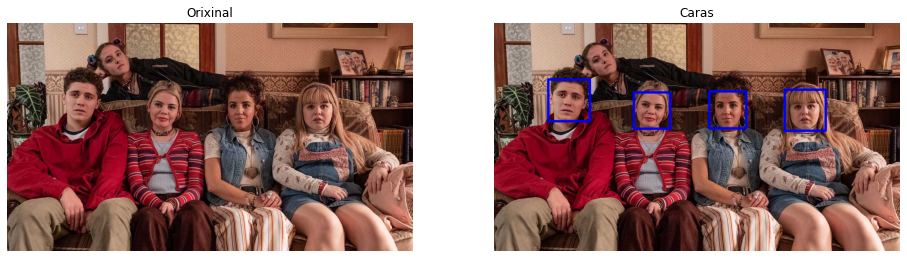

In [72]:
imaxe_base = cv2.imread('derry.jpg')
imaxe_test = imaxe_base.copy()

detectar_caras(imaxe_base, imaxe_test)

### Exercicio
- Emprega o cargador de imaxes da seguinte celda para subir a imaxe que ti escollas.
- Carga a imaxe con `imread`.
- Aplica a función `detectar_caras` para detectar as caras da túa imaxe.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
# Escribe aquí o teu código